In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
bus_routes_df = pd.read_csv('RoutesToNeighbourhoods.csv')
census_data = pd.read_csv('census_data.csv')

In [171]:
bus_routes_df=bus_routes_df.drop(columns="Unnamed: 0")

In [172]:
bus_routes_df

,Route,Neighborhoods
0,1,"['Roxbury', 'South End']"
1,10,"['South Boston', 'Roxbury', 'South Boston Wate..."
2,104,['Charlestown']
3,105,['Charlestown']
4,109,['Charlestown']
...,...,...
77,8993,['Charlestown']
78,9,"['South Boston', 'Fenway', 'Chinatown', 'South..."
79,91,['Charlestown']
80,92,['Charlestown']


In [173]:
bus_routes_df['Neighborhoods'] = bus_routes_df['Neighborhoods'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))

# Explode the 'Neighborhoods' column
bus_routes_exploded = bus_routes_df.explode('Neighborhoods')

In [174]:
bus_routes_exploded

,Route,Neighborhoods
0,1,Roxbury
0,1,South End
1,10,South Boston
1,10,Roxbury
1,10,South Boston Waterfront
...,...,...
78,9,Roxbury
78,9,Mission Hill
79,91,Charlestown
80,92,Charlestown


In [175]:
census_data.columns

Index(['tract20_nbhd', 'P0020001', 'P0020005', 'P0020006', 'P0020002',
       'P002aapi', 'P002others', 'P0040001', 'P0040005', 'P0040006',
       'P0040002', 'P004aapi', 'P004others', 'P00x0001', 'P00x0005',
       'P00x0006', 'P00x0002', 'P00xaapi', 'P00xothers', 'hhpop', 'P0050001',
       'P0050002', 'P0050003', 'P0050004', 'P0050005', 'P0050006', 'P0050007',
       'P0050008', 'P0050009', 'P0050010', 'H0010001', 'H0010002', 'H0010003',
       'hhsize', 'zipcode'],
      dtype='object')

In [176]:
merged_df = pd.merge(bus_routes_exploded, census_data, left_on='Neighborhoods', right_on='tract20_nbhd')

In [177]:
merged_df.head()

,Route,Neighborhoods,tract20_nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,P0040001,...,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize,zipcode
0,1,Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,43152,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
1,10,Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,43152,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
2,14,Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,43152,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
3,15,Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,43152,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
4,171,Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,43152,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119


In [178]:
merged_df['P0020001'] = pd.to_numeric(merged_df['P0020001'], errors='coerce')
merged_df['P0020005'] = pd.to_numeric(merged_df['P0020005'], errors='coerce')
merged_df['P0020006'] = pd.to_numeric(merged_df['P0020006'], errors='coerce')
merged_df['P0020002'] = pd.to_numeric(merged_df['P0020002'], errors='coerce')
merged_df['P002aapi'] = pd.to_numeric(merged_df['P002aapi'], errors='coerce')


In [179]:
merged_df['P002others'] = pd.to_numeric(merged_df['P002others'], errors='coerce')

In [122]:
# Grouping by 'Route' and summing the numeric values in 'P0020001' column
grouped_data = merged_df.groupby('Route')['P0020001'].sum()

In [123]:
grouped_data.head()

Route
1       85437
10     128933
104     19120
105     19120
109     19120
Name: P0020001, dtype: int64

In [124]:
# Get the top 10 routes with maximum population
top_routes_max_population = grouped_data.nlargest(10)

# Get the top 10 routes with minimum population
top_routes_min_population = grouped_data.nsmallest(10)


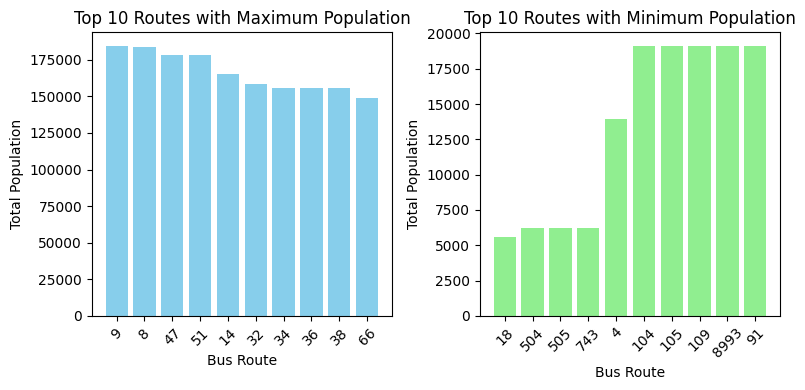

In [125]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plotting top 10 routes with maximum population
axes[0].bar(top_routes_max_population.index, top_routes_max_population.values, color='skyblue')
axes[0].set_title('Top 10 Routes with Maximum Population')
axes[0].set_xlabel('Bus Route')
axes[0].set_ylabel('Total Population')
axes[0].tick_params(axis='x', rotation=45)

# Plotting top 10 routes with minimum population
axes[1].bar(top_routes_min_population.index, top_routes_min_population.values, color='lightgreen')
axes[1].set_title('Top 10 Routes with Minimum Population')
axes[1].set_xlabel('Bus Route')
axes[1].set_ylabel('Total Population')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [126]:
grouped_data1 = merged_df.groupby('Route').agg({
    'P0020001': 'sum',  # Total population
    'P0020005': 'sum',
    'P0020006': 'sum',
     'P0020002': 'sum',
     'P002aapi': 'sum',
    'P002others' : 'sum'

    # Add other population characteristics you want to analyze
})

In [127]:
new_column_names = {
    'P0020001': 'Total Population',
    'P0020005': 'White alone',
    'P0020006': 'Black or African American alone',
    'P0020002': 'Hispanic or Latino',
    'P002aapi': 'Asian, Native Hawaiian and Pacific Islander alone, all ages',
    'P002others' : 'Other Races'

}

# Rename the columns using the 'rename()' function
grouped_data1.rename(columns=new_column_names, inplace=True)

In [128]:
grouped_data1.columns

Index(['Total Population', 'White alone', 'Black or African American alone',
       'Hispanic or Latino',
       'Asian, Native Hawaiian and Pacific Islander alone, all ages',
       'Other Races'],
      dtype='object')

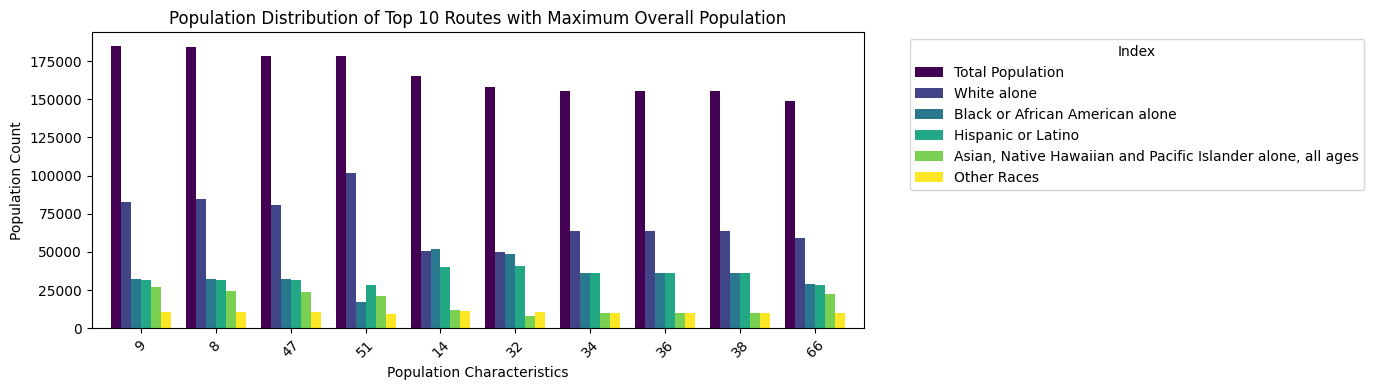

In [129]:
# Get the top 10 routes with maximum total population
top_routes_max_population = grouped_data1['Total Population'].nlargest(10)

# Extract data for the top 10 routes from the grouped data
top_routes_data = grouped_data1.loc[top_routes_max_population.index]

# Transpose the DataFrame for better plotting (rows become columns)
# top_routes_data = top_routes_data.T

# Plotting grouped bar chart for top 10 routes' population distribution
top_routes_data.plot(kind='bar', figsize=(14,4), colormap='viridis',width=0.8)
plt.xlabel('Population Characteristics')
plt.ylabel('Population Count')
plt.title('Population Distribution of Top 10 Routes with Maximum Overall Population')
plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

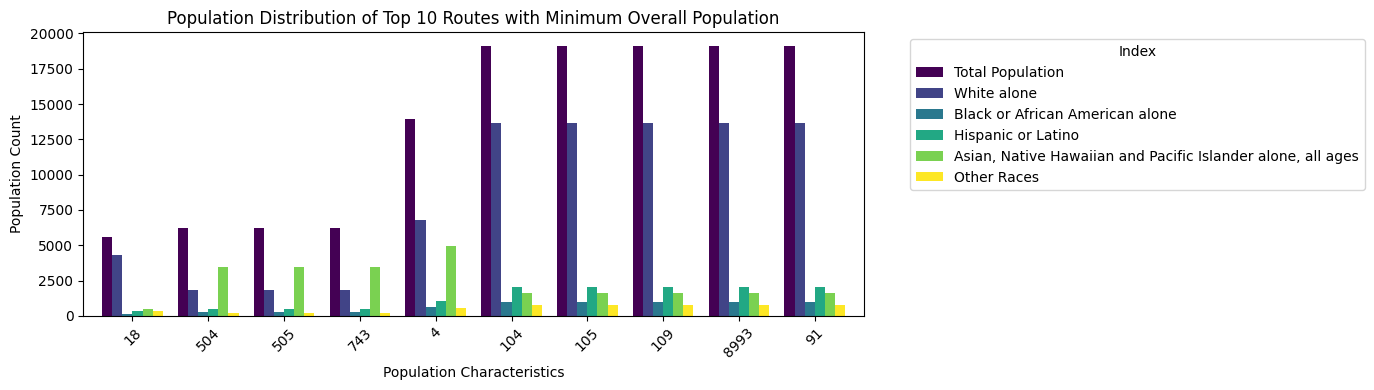

In [130]:
# Get the top 10 routes with maximum total population
top_routes_min_population = grouped_data1['Total Population'].nsmallest(10)

# Extract data for the top 10 routes from the grouped data
top_routes_data1 = grouped_data1.loc[top_routes_min_population.index]

# Transpose the DataFrame for better plotting (rows become columns)
# top_routes_data = top_routes_data.T

# Plotting grouped bar chart for top 10 routes' population distribution
top_routes_data1.plot(kind='bar', figsize=(14,4), colormap='viridis',width=0.8)
plt.xlabel('Population Characteristics')
plt.ylabel('Population Count')
plt.title('Population Distribution of Top 10 Routes with Minimum Overall Population')
plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [180]:
# Grouping the data by 'Route' and summing up the ethnic columns for each route
grouped = merged_df.groupby('Route').sum()
grouped

<ipython-input-180-e1f20464e0cc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = merged_df.groupby('Route').sum()


,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others
Route,,,,,,
1,85437,24499,25883,20631,8097,6327
10,128933,57953,27572,24834,10656,7918
104,19120,13626,990,2075,1650,779
105,19120,13626,990,2075,1650,779
109,19120,13626,990,2075,1650,779
...,...,...,...,...,...,...
8993,19120,13626,990,2075,1650,779
9,184576,82467,32426,31875,27179,10629
91,19120,13626,990,2075,1650,779


In [181]:
# Calculating the count of unique neighborhoods for each route
route_neighborhood_count = merged_df.groupby('Route')['Neighborhoods'].nunique()

# Extracting top 5 routes with the largest counts of unique neighborhoods
top_routes = route_neighborhood_count.nlargest(5).index

In [182]:
top_routes_int = [int(route) for route in top_routes]
print(top_routes_int)

[15, 39, 8, 9, 14]


In [183]:
grouped=grouped.drop(columns='P0020001')

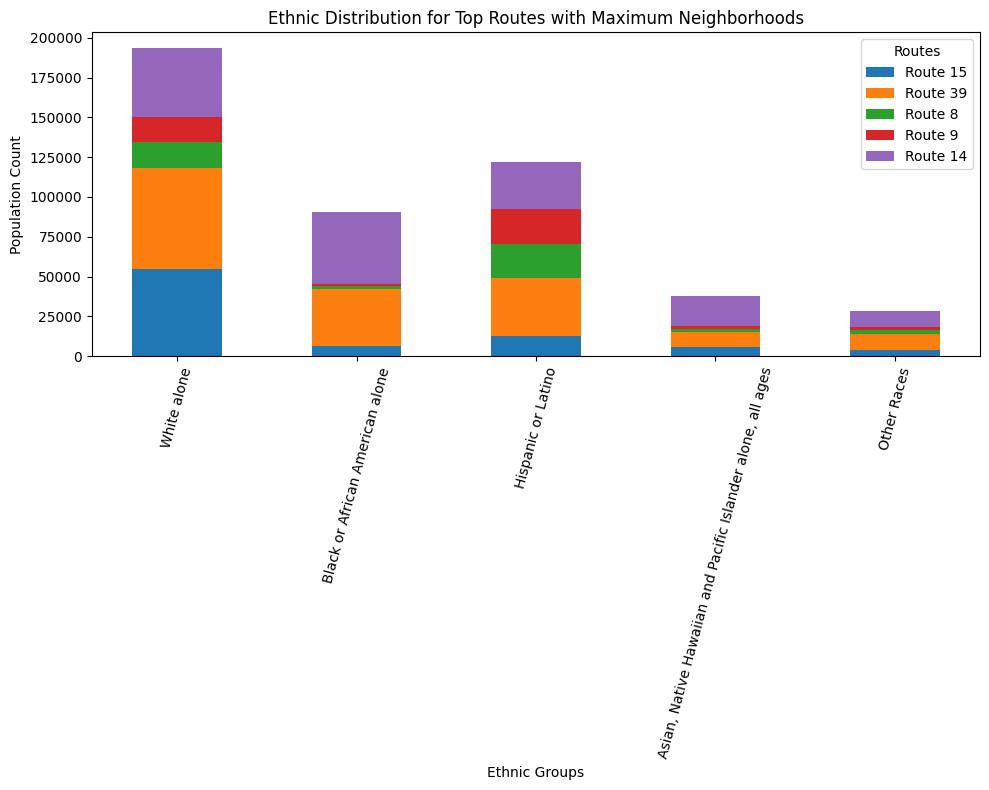

In [186]:
# Selecting ethnic columns for pie chart
ethnic_columns = ['P0020005', 'P0020006', 'P0020002', 'P002aapi','P002others']
ethnic_labels = ['White alone', 'Black or African American alone', 'Hispanic or Latino', 'Asian, Native Hawaiian and Pacific Islander alone, all ages','Other Races']

# Plotting stacked bar chart for ethnic distribution of top routes with max neighborhoods
plt.figure(figsize=(10, 8))
bottom = None
for route in top_routes_int:
    plt.bar(ethnic_labels, grouped.iloc[route], label=f'Route {route}', bottom=bottom,width=0.5)
    if bottom is None:
        bottom = grouped.iloc[route]
    else:
        bottom += grouped.iloc[route]

# Adding legend
plt.legend(title='Routes')
plt.xlabel('Ethnic Groups')
plt.ylabel('Population Count')
plt.title('Ethnic Distribution for Top Routes with Maximum Neighborhoods')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()